In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci

%matplotlib inline

Current directory

In [2]:
pwd

'E:\\Ireland\\Project\\FYProject\\test'

Calling the csv file

In [3]:
data = pd.read_csv('history_data.csv')

In [4]:
data.dtypes

Datetime                object
Maximum Temperature    float64
Minimum Temperature    float64
Temperature            float64
Wind Chill             float64
Heat Index             float64
Precipitation          float64
Snow Depth             float64
Wind Speed             float64
Wind Gust              float64
Cloud Cover            float64
Relative Humidity      float64
Conditions              object
dtype: object

In [5]:
data.head()

,Datetime,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity,Conditions
0,12/26/2019,53.7,44.7,49.4,37.5,NaN,NaN,NaN,31.3,NaN,86.3,96.44,Overcast
1,12/27/2019,51.9,48.3,50.3,42.2,NaN,NaN,NaN,18.3,NaN,90.8,98.65,Overcast
2,12/28/2019,50.1,48.3,48.9,41.4,NaN,NaN,NaN,20.8,NaN,90.0,94.07,Overcast
3,12/29/2019,50.1,46.5,48.4,40.2,NaN,NaN,NaN,19.7,NaN,90.8,97.29,Overcast
4,12/30/2019,50.1,46.5,48.4,39.6,NaN,NaN,NaN,17.2,NaN,91.3,97.83,Overcast


In [6]:
x = data["Wind Chill"]
y = data["Temperature"]

Scatter plot

Text(0, 0.5, 'Temperature')

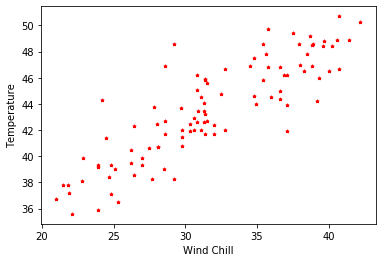

In [7]:
plt.scatter(x,y,c="r",s=10, marker = '*')
plt.xlabel('Wind Chill')
plt.ylabel('Temperature')

Function to generate coefficient values

In [8]:
def coeficient(x,y):
    
    n = np.size(x)
    mx,my = np.mean(x), np.mean(y)
    
    #sum of cross deviations of y and x
    CDxy = np.sum(x*y) - n*mx*my
    
    #sum of sqaured deviations of x
    CDxx = np.sum(x*x) - n*(mx*mx)
    
    #coefficient values
    b1 = CDxy/CDxx
    b0 = my - b1*mx
    
    return(b1,b0)

Coefficient values

In [9]:
b = coeficient(x,y)
b

(0.584601894815119, 24.99479674951924)

In [10]:
def plot_results(x,y,b):
    plt.scatter(x,y,c="r",s=10, marker = '*')
    #plt.xlabel(x)
    #plt.ylabel(y)
    
    ypred = b[1] + b[0]*x
    
    plt.plot(x,ypred,c='b', linewidth =2)
    plt.xlabel('Wind Chill')
    plt.ylabel('Temperature')
        
    plt.show()

Plotting the regression line with data points

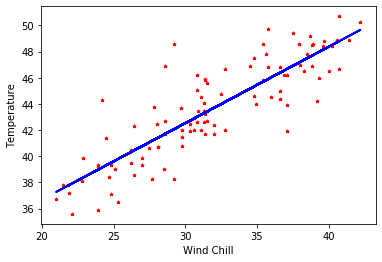

In [11]:
plot_results(x,y,b)

# Using Seaborn library

In [12]:
import seaborn as sns
sns.set()
data.head()

,Datetime,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity,Conditions
0,12/26/2019,53.7,44.7,49.4,37.5,NaN,NaN,NaN,31.3,NaN,86.3,96.44,Overcast
1,12/27/2019,51.9,48.3,50.3,42.2,NaN,NaN,NaN,18.3,NaN,90.8,98.65,Overcast
2,12/28/2019,50.1,48.3,48.9,41.4,NaN,NaN,NaN,20.8,NaN,90.0,94.07,Overcast
3,12/29/2019,50.1,46.5,48.4,40.2,NaN,NaN,NaN,19.7,NaN,90.8,97.29,Overcast
4,12/30/2019,50.1,46.5,48.4,39.6,NaN,NaN,NaN,17.2,NaN,91.3,97.83,Overcast


In [13]:
np.unique(data["Maximum Temperature"])

array([39.2, 41. , 42.8, 44.6, 46.3, 46.4, 48.1, 48.2, 48.3, 49.9, 50. ,
       50.1, 51.7, 51.8, 51.9, 53.6, 53.7, 55.3, 57.2])

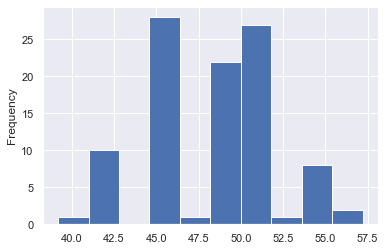

In [14]:
data["Maximum Temperature"].plot(kind="hist")

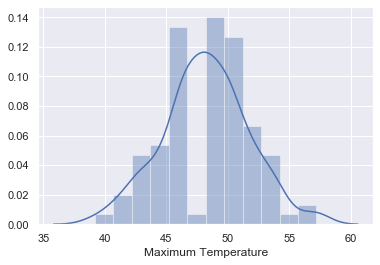

In [15]:
sns.distplot(data["Maximum Temperature"])

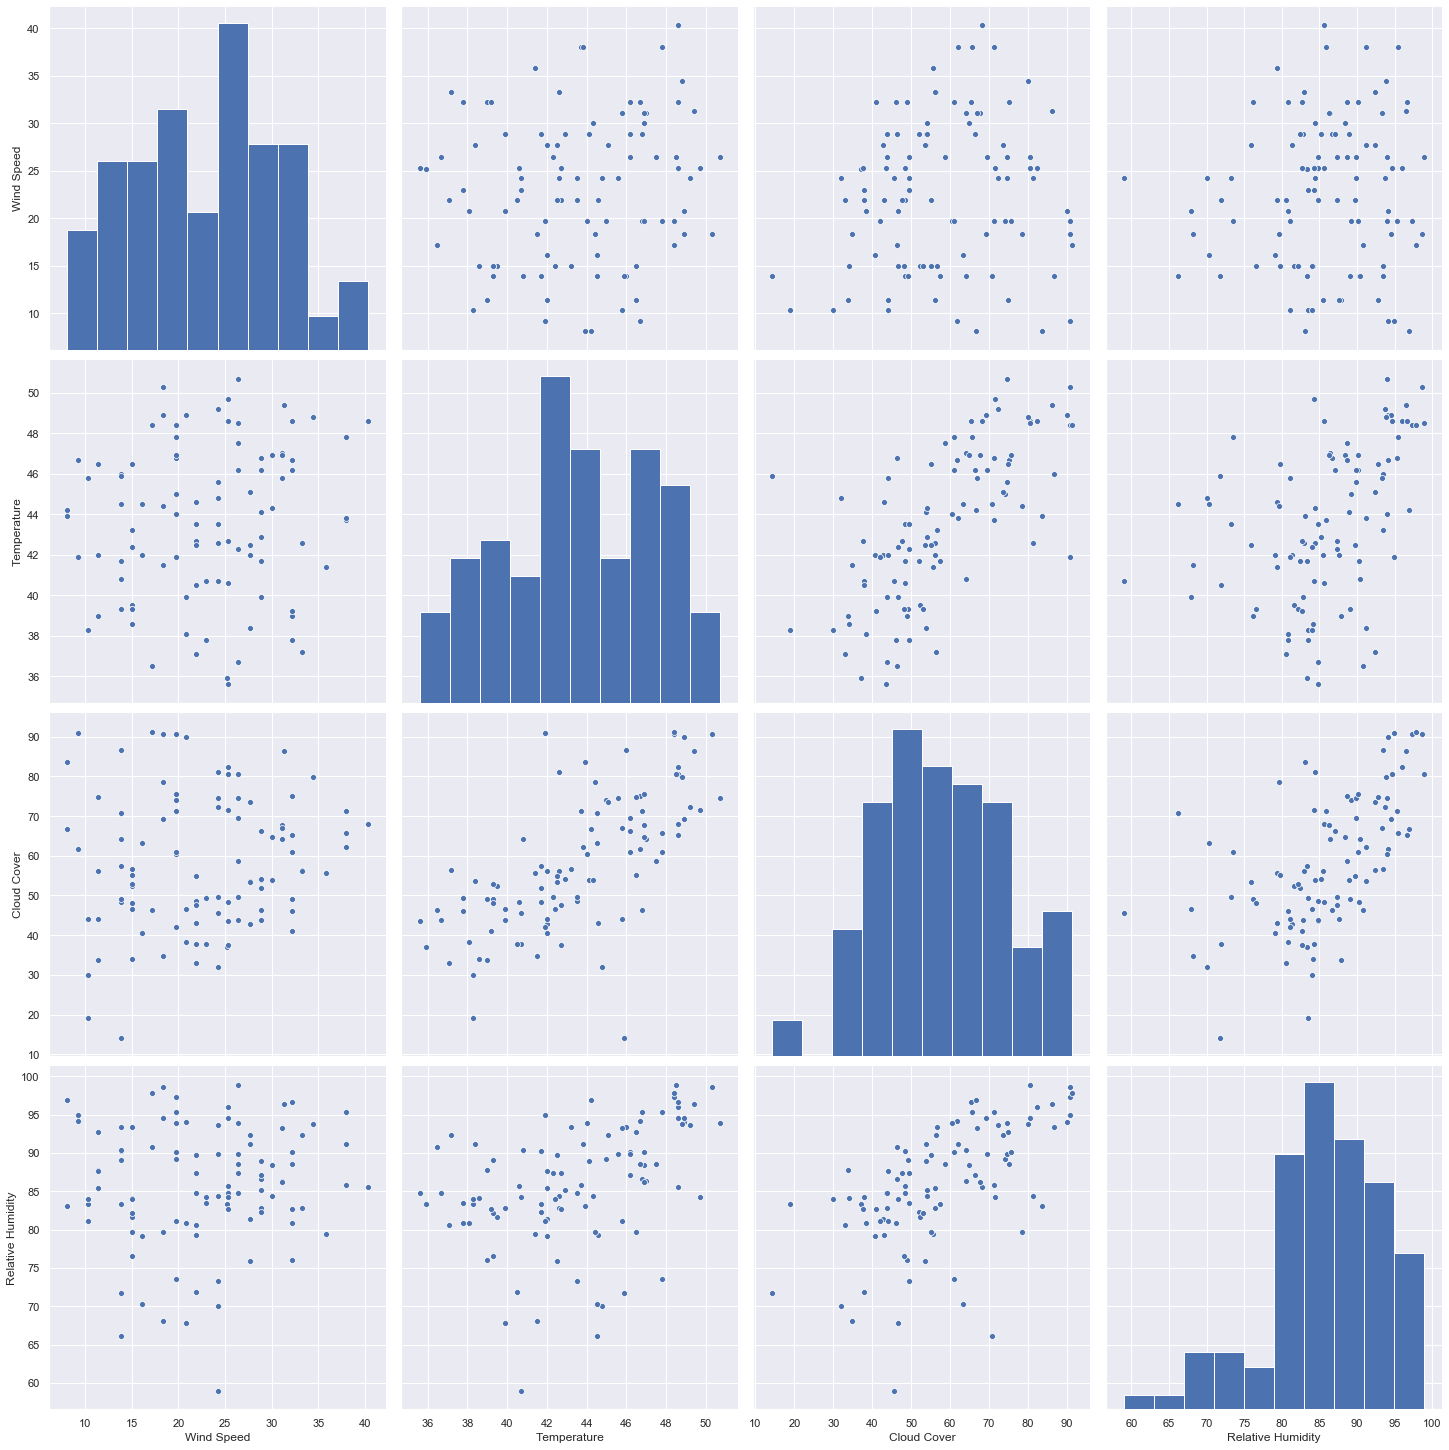

In [16]:
df = data[["Wind Speed","Temperature","Cloud Cover","Relative Humidity"]]
sns.pairplot(df,height=5)

#scatterplot using seaborn
#sns.scatterplot(x="Maximum Temperature",y="Temperature", data=df)

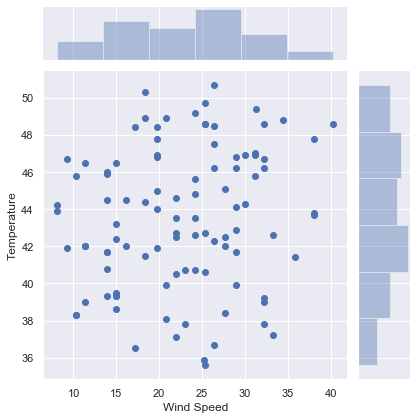

In [17]:
sns.jointplot(x="Wind Speed",y="Temperature",data=df)

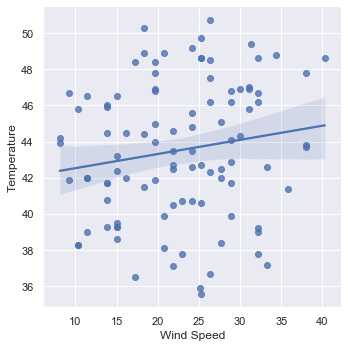

In [18]:
sns.lmplot(x="Wind Speed",y="Temperature",data=df)

[Text(0, 0, '8.1'),
 Text(0, 0, '9.2'),
 Text(0, 0, '10.3'),
 Text(0, 0, '11.4'),
 Text(0, 0, '13.9'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.1'),
 Text(0, 0, '17.2'),
 Text(0, 0, '18.3'),
 Text(0, 0, '19.7'),
 Text(0, 0, '20.8'),
 Text(0, 0, '21.9'),
 Text(0, 0, '23.0'),
 Text(0, 0, '24.2'),
 Text(0, 0, '25.2'),
 Text(0, 0, '25.3'),
 Text(0, 0, '26.4'),
 Text(0, 0, '27.7'),
 Text(0, 0, '28.9'),
 Text(0, 0, '30.0'),
 Text(0, 0, '31.1'),
 Text(0, 0, '31.3'),
 Text(0, 0, '32.2'),
 Text(0, 0, '33.3'),
 Text(0, 0, '34.4'),
 Text(0, 0, '35.8'),
 Text(0, 0, '38.0'),
 Text(0, 0, '40.3')]

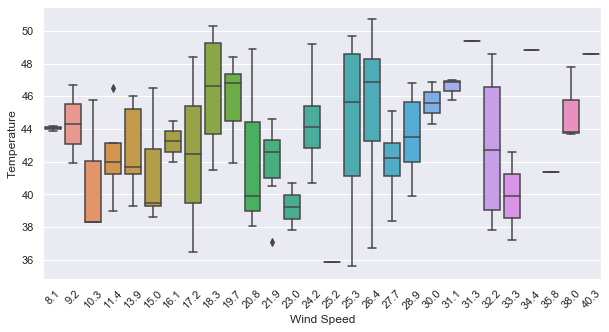

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.boxplot(x='Wind Speed',y='Temperature', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

# ax=sns.swarmplot(x='Maximum Temperature',y='Temperature',data=df)
#ax=sns.countplot(x='Mfr Name', data=df)
#ax=sns.countplot(x='Mfr Name', data=df)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
# sns.heatmap(df2)

# Multi-regression model

In [37]:
data.head()

,Datetime,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity,Conditions
0,12/26/2019,53.7,44.7,49.4,37.5,NaN,NaN,NaN,31.3,NaN,86.3,96.44,Overcast
1,12/27/2019,51.9,48.3,50.3,42.2,NaN,NaN,NaN,18.3,NaN,90.8,98.65,Overcast
2,12/28/2019,50.1,48.3,48.9,41.4,NaN,NaN,NaN,20.8,NaN,90.0,94.07,Overcast
3,12/29/2019,50.1,46.5,48.4,40.2,NaN,NaN,NaN,19.7,NaN,90.8,97.29,Overcast
4,12/30/2019,50.1,46.5,48.4,39.6,NaN,NaN,NaN,17.2,NaN,91.3,97.83,Overcast


In [75]:
y = data["Temperature"]
x = data[["Wind Chill","Wind Speed","Cloud Cover"]]
X = sm.add_constant(x)

import statsmodels.api as sm
mod = sm.OLS(y,X).fit()

mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.25e-36
Time:                        10:52:33   Log-Likelihood:                -186.30
No. Observations:                 100   AIC:                             380.6
Df Residuals:                      96   BIC:                             391.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.0211      1.147     18.332      0.000      18.745      23.297
Wind Chill      0.5809      0.041     14.162      0.000       0.500       0.662
Wind Speed      0.1384      0.022      6.339      0.000       0.095       0.182
Cloud Cover     0.0165      0.013      1.224      0.224      -0.010       0.043
==============================================================================
Omnibus:                       11.803   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.341
Skew:                           0.756   Prob(JB):                      0.00209
Kurtosis:                       3.821   Cond. No.                         516.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
mod.params

const          21.021059
Wind Chill      0.580935
Wind Speed      0.138449
Cloud Cover     0.016491
dtype: float64

In [81]:
a=mod.params[0]
b=mod.params[1]
c=mod.params[2]
d=mod.params[3]
y= a + b*data["Wind Chill"] + c*data["Wind Speed"] + d*data["Cloud Cover"]
y

0     48.562728
1     49.567489
2     49.435672
3     48.599448
4     47.913009
        ...    
95    37.974329
96    42.361029
97    45.026702
98    45.434075
99    46.257891
Length: 100, dtype: float64

# Using curve fit

model creation and coefficient calculation

In [20]:
import scipy as sci
from scipy import optimize

def model(x,m,b):
    return m + x*b

initialval = [1,1]
fit = sci.optimize.curve_fit(model,data["Temperature"], data["Wind Chill"],p0 =initialval)

In [21]:
fit

(array([-23.22254045,   1.26176509]),
 array([[ 1.10271120e+01, -2.51486562e-01],
        [-2.51486562e-01,  5.77837787e-03]]))

In [22]:
ans,cov = fit

In [23]:
ans

array([-23.22254045,   1.26176509])

In [24]:
cov

array([[ 1.10271120e+01, -2.51486562e-01],
       [-2.51486562e-01,  5.77837787e-03]])

Text(0, 0.5, 'Temperature')

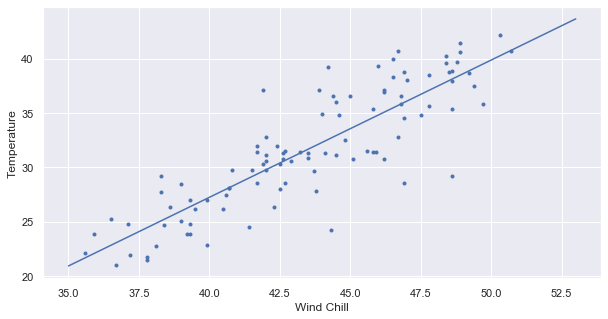

In [25]:
plt.errorbar(data["Temperature"], data["Wind Chill"], fmt = 'b.', label = "linear relation")

t = np.linspace(35,53)
plt.plot(t,model(t,ans[0],ans[1]), label = "regression line")

plt.xlabel("Wind Chill")
plt.ylabel("Temperature")

# LR using Stats package

In [26]:
from scipy import stats
slope,intercept,rvalue,pvalue,stderr = stats.linregress(data["Maximum Temperature"],data["Temperature"])

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\priya\Anaconda3\lib\site-packages\seaborn\relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


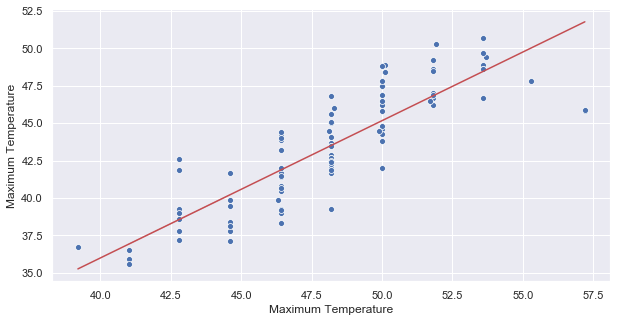

In [27]:
def predict(x):
    return slope*x + intercept

sns.scatterplot(data["Maximum Temperature"],data["Temperature"])
sns.lineplot(data["Maximum Temperature"], predict(data["Maximum Temperature"]),c='r')

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\priya\Anaconda3\lib\site-packages\seaborn\relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


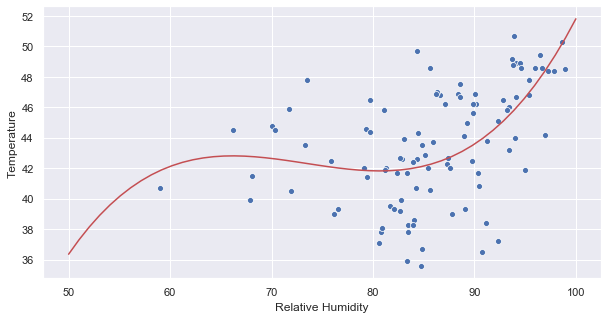

In [28]:
sns.scatterplot(data["Relative Humidity"],data["Temperature"])
fit = np.polyfit(data["Relative Humidity"],data["Temperature"],3)

xp = np.linspace(50,100,50)
yp = np.poly1d(fit)        #it is a convienient way of getting the predicted value
#https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
sns.lineplot(xp,yp(xp),c='r')

In [29]:
yp

poly1d([ 6.50540939e-04, -1.43293801e-01,  1.04186474e+01, -2.07660143e+02])

# AHU data

In [30]:
dat = pd.read_csv('all_in_one_finish_20130219_noblanks.csv')

In [31]:
dat.head(2)
#dat.tail(5)

,Date / Time,AHU9 CHW Offcoil Temperature (1 minute),AHU9 CHW Valve Position (1 minute),AHU9 Fresh Air Damper Position (1 minute),AHU9 Frost Coil Valve Position (1 minute),AHU9 Frost Offcoil Temperature (1 minute),AHU9 Humidity Control Output (1 minute),AHU9 Reheat Coil Valve Positio (1 minute),AHU9 Reheat Offcoil Temperatur (1 minute),AHU9 Return Air Humidity (1 minute),...,Post Heating Coil Humidity (1 minute),Post Cooling Coil Humidity (1 minute),Post Reheat Coil Humidity (1 minute),Supply Air Velocity (1 minute),Chilled Water Comm Flo Temp (1 minute),Chilled Water Comm Rtn Temp (1 minute),Boilers Com Flow Temp (1 minute),Boiler Com Rtn Temp (1 minute),Post Return Fan Temperture (1 minute),Post Supply Fan Temperture (1 minute)
0,12/09/2012 00:00,15.7112,0.0,0.0,0.0,15.3903,0.0,0.0,15.3880,76.0336,...,62.45,62.98,71.91,0.0,11.291,11.484,37.742001,35.883999,13.71,13.70
1,12/09/2012 00:01,15.7112,0.0,0.0,0.0,15.3090,0.0,0.0,15.3085,76.0336,...,62.36,63.13,71.40,0.0,11.291,11.501,37.733002,35.874001,13.70,13.69


In [32]:
dat.columns, dat.shape
#dat[['Date / Time','AHU9 CHW Offcoil Temperature (1 minute)','AHU9 CHW Valve Position (1 minute)']][:5]
#len(dat)

(Index(['Date / Time', 'AHU9 CHW Offcoil Temperature (1 minute)',
        'AHU9 CHW Valve Position (1 minute)',
        'AHU9 Fresh Air Damper Position (1 minute)',
        'AHU9 Frost Coil Valve Position (1 minute)',
        'AHU9 Frost Offcoil Temperature (1 minute)',
        'AHU9 Humidity Control Output (1 minute)',
        'AHU9 Reheat Coil Valve Positio (1 minute)',
        'AHU9 Reheat Offcoil Temperatur (1 minute)',
        'AHU9 Return Air Humidity (1 minute)',
        'AHU9 Return Air Temperature (1 minute)',
        'AHU9 Space Air Hum Setpoint (1 minute)',
        'AHU9 Space Air Temp Setpoint (1 minute)',
        'AHU9 Supply Air Humidity (1 minute)',
        'AHU9 Supply Air Temperature (1 minute)',
        'Outside Air Temperature (1 minute)',
        'AHU09 Return CO2 Transmitter (1 minute)',
        'Outside Air Humidity (1 minute)', 'Extract Air Velocity (1 minute)',
        'Mixed Air Temperture (1 minute)', 'Mixed Air Humidity (1 minute)',
        'Post Heating Coil

In [33]:
dat.sort_values(['Date / Time'])

,Date / Time,AHU9 CHW Offcoil Temperature (1 minute),AHU9 CHW Valve Position (1 minute),AHU9 Fresh Air Damper Position (1 minute),AHU9 Frost Coil Valve Position (1 minute),AHU9 Frost Offcoil Temperature (1 minute),AHU9 Humidity Control Output (1 minute),AHU9 Reheat Coil Valve Positio (1 minute),AHU9 Reheat Offcoil Temperatur (1 minute),AHU9 Return Air Humidity (1 minute),...,Post Heating Coil Humidity (1 minute),Post Cooling Coil Humidity (1 minute),Post Reheat Coil Humidity (1 minute),Supply Air Velocity (1 minute),Chilled Water Comm Flo Temp (1 minute),Chilled Water Comm Rtn Temp (1 minute),Boilers Com Flow Temp (1 minute),Boiler Com Rtn Temp (1 minute),Post Return Fan Temperture (1 minute),Post Supply Fan Temperture (1 minute)
157907,01/02/2013 00:00,17.854500,0.0,0.0,0.0,17.774500,0.0,0.0,17.41820,86.141396,...,48.62,49.76,61.98,0.0,10.232,10.320,67.584000,64.276001,9.90,9.37
157908,01/02/2013 00:01,17.854500,0.0,0.0,0.0,17.680000,0.0,0.0,17.28760,86.563599,...,48.70,49.89,61.86,0.0,10.232,10.320,67.584000,64.276001,9.89,9.37
157909,01/02/2013 00:02,17.854500,0.0,0.0,0.0,17.680000,0.0,0.0,17.28760,86.563599,...,48.75,49.91,61.96,0.0,10.232,10.320,67.584000,64.103996,9.90,9.37
157910,01/02/2013 00:03,17.854500,0.0,0.0,0.0,17.680000,0.0,0.0,17.15700,86.563599,...,48.88,50.02,62.35,0.0,10.224,10.320,67.584000,64.084999,9.90,9.37
157911,01/02/2013 00:04,17.759201,0.0,0.0,0.0,17.585499,0.0,0.0,17.15700,86.563599,...,48.96,50.14,62.46,0.0,10.232,10.320,67.449997,64.103996,9.89,9.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51181,31/10/2012 19:56,8.556800,0.0,0.0,0.0,8.560190,0.0,0.0,7.89296,85.915596,...,90.34,88.16,89.31,0.0,5.772,5.868,37.242001,36.539001,9.62,8.36
51182,31/10/2012 19:57,8.556800,0.0,0.0,0.0,8.560190,0.0,0.0,7.89296,86.085396,...,90.34,88.28,89.35,0.0,5.829,5.954,37.049000,36.327000,9.59,8.36
51183,31/10/2012 19:58,8.556800,0.0,0.0,0.0,8.560190,0.0,0.0,7.89296,86.170296,...,90.32,88.16,89.31,0.0,5.858,5.964,36.875999,36.067001,9.52,8.35
51184,31/10/2012 19:59,8.556800,0.0,0.0,0.0,8.560190,0.0,0.0,7.89296,86.085396,...,90.31,88.16,89.36,0.0,5.868,5.983,36.759998,35.681999,9.51,8.36


In [34]:
dat.describe()

,AHU9 CHW Offcoil Temperature (1 minute),AHU9 CHW Valve Position (1 minute),AHU9 Fresh Air Damper Position (1 minute),AHU9 Frost Coil Valve Position (1 minute),AHU9 Frost Offcoil Temperature (1 minute),AHU9 Humidity Control Output (1 minute),AHU9 Reheat Coil Valve Positio (1 minute),AHU9 Reheat Offcoil Temperatur (1 minute),AHU9 Return Air Humidity (1 minute),AHU9 Return Air Temperature (1 minute),...,Post Heating Coil Humidity (1 minute),Post Cooling Coil Humidity (1 minute),Post Reheat Coil Humidity (1 minute),Supply Air Velocity (1 minute),Chilled Water Comm Flo Temp (1 minute),Chilled Water Comm Rtn Temp (1 minute),Boilers Com Flow Temp (1 minute),Boiler Com Rtn Temp (1 minute),Post Return Fan Temperture (1 minute),Post Supply Fan Temperture (1 minute)
count,183991.000000,183991.000000,183991.000000,183991.000000,183991.000000,183991.000000,183991.000000,183991.000000,183991.000000,183991.000000,...,183991.000000,183991.000000,183991.000000,183991.000000,183991.00000,183991.000000,183991.000000,183991.000000,183991.000000,183991.000000
mean,17.552355,1.261905,10.024924,0.970922,18.721040,3.419359,2.847819,18.284871,73.676607,12.587029,...,54.357003,54.488885,60.526760,0.335995,9.48776,9.822103,63.026734,59.342712,13.801799,13.819292
std,3.622785,10.716082,19.144843,3.171134,4.121909,11.638333,10.413402,4.478354,13.181021,5.146174,...,7.889272,8.273928,9.141178,0.563279,2.25472,2.222389,10.610351,10.240399,5.272638,5.277837
min,4.310960,0.000000,0.000000,0.000000,4.062540,0.000000,0.000000,3.690580,40.250000,2.014000,...,30.140000,22.940000,15.890000,0.000000,0.39600,0.588000,10.862000,7.874000,3.150000,3.640000
25%,15.462800,0.000000,0.000000,0.000000,16.725601,0.000000,0.000000,16.020000,58.577198,8.269490,...,48.620000,49.090000,53.700000,0.000000,9.19900,9.765000,63.320000,59.655998,9.400000,9.640000
50%,18.516399,0.000000,0.000000,0.000000,19.818899,0.000000,0.000000,19.369001,77.677597,11.344190,...,51.910000,51.910000,60.220000,0.000000,10.04000,10.390000,67.011002,62.727001,13.060000,12.690000
75%,20.162500,0.000000,19.954111,0.000000,21.180000,0.000000,0.000000,20.909201,85.537201,18.839556,...,59.040000,59.050000,66.810000,1.220000,10.67900,10.862000,68.750999,64.849998,19.700000,19.300000
max,27.312601,100.000000,100.000000,99.989998,28.398001,100.000000,100.000000,52.909000,92.604698,29.067020,...,93.900000,92.740000,95.270000,1.390000,14.84400,15.842000,82.116997,77.528999,27.490000,48.890000


In [35]:
countVP = dat['AHU9 CHW Valve Position (1 minute)'].value_counts()
countVP

0.000000      180532
99.989998       1813
100.000000       102
49.490002         49
98.989899         31
               ...  
36.360001          1
3.279600           1
0.762660           1
8.148001           1
1.280400           1
Name: AHU9 CHW Valve Position (1 minute), Length: 690, dtype: int64

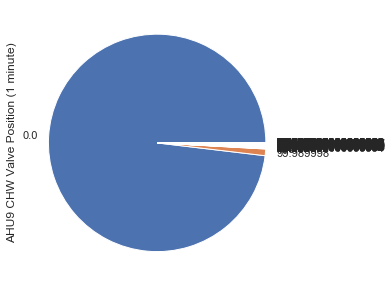

In [36]:
countVP.plot(kind='pie')